In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [2]:
d3 = pd.read_csv("norm540.txt",delimiter='\t',usecols=range(3,22))

Statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [3]:
d3.tail()

1.690468  -0.159688  -0.646115  -0.252007  -0.609794  0.579927  0.375313  \
534 -0.037053  -0.159688  -0.435401  -0.410886  -1.126751 -0.436004 -0.405184   
535 -0.584681  -0.407623  -0.957168  -0.493780   0.066717 -0.436004 -0.405184   
536 -0.559789   0.881638   0.066299  -1.053311  -1.088458 -0.436004 -0.405184   
537 -0.753949  -0.407623  -0.029024  -0.701014   0.366680 -0.436004 -0.405184   
538 -0.968022  -0.407623  -0.686250  -1.011865   1.387829 -0.436004 -0.405184   

     -0.352386  -0.260224  -0.759128  -0.013842  -0.540653  0.946521  \
534  -0.352386  -0.260224  -0.759128  -0.512160  -0.540653 -0.547986   
535   4.102756   0.045922  -0.069195  -0.013842  -0.540653 -0.846887   
536  -0.352386  -0.260224  -0.759128  -0.512160  -0.540653 -0.846887   
537  -0.352386  -0.260224   1.770626   0.484475  -0.353270 -0.547986   
538   0.433816   0.045922   1.540648  -0.013842  -0.165887 -0.846887   

     -0.227922  -0.225045  -0.116312  0.635812  -0.409247  -0.310419  
534  -0.227922   7.986072  -0.685937 -0.541391  -0.409247   5.216791  
535  -0.227922  -0.225045   1.592561 -0.541391   3.054169  -0.310419  
536  -0.227922  -0.225045   5.010309 -0.541391  -0.409247  -0.310419  
537  -0.227922  -0.225045  -0.685937 -0.541391  -0.409247  -0.310419  
538  -0.227922  -0.225045  -0.116312 -0.541391   0.368255  -0.310419

In [4]:
ar=[]
for i in range(d3.shape[1]):
    ar.append("col-"+str(i+1))
d3.columns=ar

In [5]:
sc = StandardScaler()
temp = sc.fit_transform(d3)

In [6]:
temp

array([[ 1.69812021, -0.15998816, -0.53212928, ...,  2.04488611,
        -0.41006989, -0.03463832],
       [ 1.67316184, -0.40792905,  0.85811822, ...,  1.66767137,
        -0.41006989, -0.31102311],
       [ 2.24221716, -0.40792905, -0.41669349, ...,  2.64290982,
        -0.41006989, -0.31102311],
       ...,
       [-0.55813698,  0.88136257,  0.06512549, ..., -0.54041434,
        -0.41006989, -0.31102311],
       [-0.75281469, -0.40792905, -0.03023452, ..., -0.54041434,
        -0.41006989, -0.31102311],
       [-0.96745851, -0.40792905, -0.68771566, ..., -0.54041434,
         0.36755309, -0.31102311]])

In [7]:
d4=pd.DataFrame(temp)

In [8]:
d4

0         1         2         3         4         5         6   \
0    1.698120 -0.159988 -0.532129  0.127462 -0.483448  2.867744  0.376059   
1    1.673162 -0.407929  0.858118 -0.632441 -0.445142  2.613683 -0.404541   
2    2.242217 -0.407929 -0.416693 -0.425195 -1.121888  0.073061  4.018855   
3    2.222250 -0.159988  1.129140 -0.045243 -1.083582  1.343372  3.758655   
4    1.837888  0.385481 -0.572281  0.092921 -0.611137  1.597433  0.896458   
..        ...       ...       ...       ...       ...       ...       ...   
534 -0.034007 -0.159988 -0.436769 -0.411378 -1.128272 -0.435064 -0.404541   
535 -0.583095 -0.407929 -0.958739 -0.494277  0.065608 -0.435064 -0.404541   
536 -0.558137  0.881363  0.065125 -1.053841 -1.089966 -0.435064 -0.404541   
537 -0.752815 -0.407929 -0.030235 -0.701523  0.365675 -0.435064 -0.404541   
538 -0.967459 -0.407929 -0.687716 -1.012392  1.387177 -0.435064 -0.404541   

           7         8         9         10        11        12        13  \
0   -0.353080 -0.260723 -0.530843 -0.512186 -0.541803 -0.247534 -0.228356   
1   -0.353080 -0.260723 -0.530843 -0.512186 -0.541803  1.248218 -0.228356   
2   -0.353080 -0.260723 -0.530843 -0.512186 -0.541803 -0.247534 -0.228356   
3   -0.353080 -0.260723 -0.760944 -0.512186 -0.541803 -0.247534 -0.228356   
4   -0.353080 -0.260723 -0.760944 -0.512186 -0.354370  0.649916 -0.228356   
..        ...       ...       ...       ...       ...       ...       ...   
534 -0.353080 -0.260723 -0.760944 -0.512186 -0.541803 -0.546685 -0.228356   
535  4.102576  0.045442 -0.070641 -0.013868 -0.541803 -0.845835 -0.228356   
536 -0.353080 -0.260723 -0.760944 -0.512186 -0.541803 -0.845835 -0.228356   
537 -0.353080 -0.260723  1.770166  0.484450 -0.354370 -0.546685 -0.228356   
538  0.433212  0.045442  1.540065 -0.013868 -0.166936 -0.845835 -0.228356   

           14        15        16        17        18  
0    0.185101 -0.401345  2.044886 -0.410070 -0.034638  
1   -0.225473 -0.401345  1.667671 -0.410070 -0.311023  
2   -0.225473 -0.116529  2.642910 -0.410070 -0.311023  
3   -0.225473 -0.401345  2.661311 -0.410070 -0.311023  
4   -0.225473 -0.401345  1.483664 -0.410070 -0.311023  
..        ...       ...       ...       ...       ...  
534  7.986031 -0.686162 -0.540414 -0.410070  5.216683  
535 -0.225473  1.592365 -0.540414  3.053885 -0.311023  
536 -0.225473  5.010156 -0.540414 -0.410070 -0.311023  
537 -0.225473 -0.686162 -0.540414 -0.410070 -0.311023  
538 -0.225473 -0.116529 -0.540414  0.367553 -0.311023  

[539 rows x 19 columns]

In [9]:
d3

col-1     col-2     col-3     col-4     col-5     col-6     col-7  \
0    1.690468 -0.159688 -0.530724  0.127922 -0.482150  2.865772  0.375313   
1    1.665576 -0.407623  0.858984 -0.631936 -0.443857  2.611790 -0.405184   
2    2.233118 -0.407623 -0.415333 -0.424702 -1.120369  0.071962  4.017633   
3    2.213204 -0.159688  1.129901 -0.044773 -1.082076  1.341876  3.757467   
4    1.829864  0.385768 -0.570860  0.093383 -0.609794  1.595858  0.895644   
..        ...       ...       ...       ...       ...       ...       ...   
534 -0.037053 -0.159688 -0.435401 -0.410886 -1.126751 -0.436004 -0.405184   
535 -0.584681 -0.407623 -0.957168 -0.493780  0.066717 -0.436004 -0.405184   
536 -0.559789  0.881638  0.066299 -1.053311 -1.088458 -0.436004 -0.405184   
537 -0.753949 -0.407623 -0.029024 -0.701014  0.366680 -0.436004 -0.405184   
538 -0.968022 -0.407623 -0.686250 -1.011865  1.387829 -0.436004 -0.405184   

        col-8     col-9    col-10    col-11    col-12    col-13    col-14  \
0   -0.352386 -0.260224 -0.529150 -0.512160 -0.540653 -0.249084 -0.227922   
1   -0.352386 -0.260224 -0.529150 -0.512160 -0.540653  1.245422 -0.227922   
2   -0.352386 -0.260224 -0.529150 -0.512160 -0.540653 -0.249084 -0.227922   
3   -0.352386 -0.260224 -0.759128 -0.512160 -0.540653 -0.249084 -0.227922   
4   -0.352386 -0.260224 -0.759128 -0.512160 -0.353270  0.647619 -0.227922   
..        ...       ...       ...       ...       ...       ...       ...   
534 -0.352386 -0.260224 -0.759128 -0.512160 -0.540653 -0.547986 -0.227922   
535  4.102756  0.045922 -0.069195 -0.013842 -0.540653 -0.846887 -0.227922   
536 -0.352386 -0.260224 -0.759128 -0.512160 -0.540653 -0.846887 -0.227922   
537 -0.352386 -0.260224  1.770626  0.484475 -0.353270 -0.547986 -0.227922   
538  0.433816  0.045922  1.540648 -0.013842 -0.165887 -0.846887 -0.227922   

       col-15    col-16    col-17    col-18    col-19  
0    0.185510 -0.401124  2.042938 -0.409247 -0.034059  
1   -0.225045 -0.401124  1.665865 -0.409247 -0.310419  
2   -0.225045 -0.116312  2.640737 -0.409247 -0.310419  
3   -0.225045 -0.401124  2.659131 -0.409247 -0.310419  
4   -0.225045 -0.401124  1.481927 -0.409247 -0.310419  
..        ...       ...       ...       ...       ...  
534  7.986072 -0.685937 -0.541391 -0.409247  5.216791  
535 -0.225045  1.592561 -0.541391  3.054169 -0.310419  
536 -0.225045  5.010309 -0.541391 -0.409247 -0.310419  
537 -0.225045 -0.685937 -0.541391 -0.409247 -0.310419  
538 -0.225045 -0.116312 -0.541391  0.368255 -0.310419  

[539 rows x 19 columns]

In [10]:
d1 = pd.read_excel("aggregateRockData-1.xlsx")
# d2 = pd.read_csv("norm540.txt",delimiter='\t',usecols=range(3,22))
d1.rename(columns={"1.1": "RockCategory"}, inplace=True)
d1.rename(columns={"1.3": "token"}, inplace=True)

# ar=[]
# for i in range(d2.shape[1]):
#     ar.append("col-"+str(i+1))
# d2.columns=ar
label = d1['RockCategory']
tokens = d1['token']

# sc = StandardScaler()
# temp = sc.fit_transform(d2)

# data=pd.concat([d2,label],axis=1)
# data=data[:480]

In [11]:
d1.tail()

1  RockCategory  1.2  token  2  57  19   6  46  36  0.6951219512195121  \
534  716             3   28     18  4   1   0  81  57  25            0.012195   
535  717             3   29     17  4   2  44  36  40  42            0.024390   
536  718             3   29     18  4  25   9  48  27  55            0.304878   
537  719             3   30     17  4  16  46  20  23  59            0.195122   
538  720             3   30     18  4   6  36  40  30  52            0.073171   

     0.23170731707317074  0.07317073170731707  0.5609756097560976  
534             0.000000             0.987805            0.695122  
535             0.536585             0.439024            0.487805  
536             0.109756             0.585366            0.329268  
537             0.560976             0.243902            0.280488  
538             0.439024             0.487805            0.365854

In [12]:
data=pd.concat([d4,label,tokens],axis=1)
data=data[:480]

In [13]:
temp.shape

(539, 19)

In [14]:
data=data[:480]

In [15]:
d1.head()

1  RockCategory  1.2  token  2  57  19   6  46  36  0.6951219512195121  \
0  2             1    1      2  3  59  10  13  24  58            0.719512   
1  3             1    1      3  3  37  28  17  20  62            0.451220   
2  4             1    1      4  3  41  11  30  29  53            0.500000   
3  5             1    1      5  3  42   6  34  25  57            0.512195   
4  6             1    1      6  3  69   8   4  28  53            0.851852   

   0.23170731707317074  0.07317073170731707  0.5609756097560976  
0             0.121951             0.158537            0.292683  
1             0.341463             0.207317            0.243902  
2             0.134146             0.365854            0.353659  
3             0.073171             0.414634            0.304878  
4             0.098765             0.049383            0.345679

In [16]:
data.tail()

0         1         2         3         4         5         6  \
475 -0.952483 -0.159988  0.817967 -1.005484 -0.892050 -0.435064 -0.404541   
476 -0.797740 -0.407929  2.574596 -1.150555  0.250756 -0.435064 -0.404541   
477 -1.032350 -0.407929 -0.185822 -1.005484 -0.285533 -0.435064 -0.404541   
478 -1.087259 -0.407929 -0.687716 -0.950218  0.589129 -0.435064 -0.404541   
479  1.533393  0.187128 -0.386580 -0.439010 -0.400452  0.581185 -0.144341   

           7         8         9  ...        11        12        13        14  \
475 -0.35308 -0.260723  1.079863  ... -0.541803 -0.546685 -0.228356 -0.225473   
476 -0.35308 -0.260723  1.309963  ... -0.541803 -0.546685 -0.228356 -0.225473   
477 -0.35308 -0.260723  1.079863  ... -0.541803 -0.247534 -0.228356 -0.225473   
478 -0.35308 -0.260723  1.770166  ... -0.541803 -0.546685 -0.228356 -0.225473   
479 -0.35308 -0.260723 -0.760944  ... -0.541803  1.248218 -0.228356 -0.225473   

           15        16       17        18  RockCategory  token  
475  1.307550 -0.540414 -0.41007 -0.311023             3     13  
476  0.453102 -0.540414 -0.41007 -0.311023             3     14  
477  0.453102 -0.540414 -0.41007 -0.311023             3     15  
478  0.168286 -0.540414 -0.41007 -0.311023             3     16  
479 -0.401345  0.342821 -0.41007 -0.311023             1     17  

[5 rows x 21 columns]

In [17]:
data.shape

(480, 21)

In [18]:
data.tail()

0         1         2         3         4         5         6  \
475 -0.952483 -0.159988  0.817967 -1.005484 -0.892050 -0.435064 -0.404541   
476 -0.797740 -0.407929  2.574596 -1.150555  0.250756 -0.435064 -0.404541   
477 -1.032350 -0.407929 -0.185822 -1.005484 -0.285533 -0.435064 -0.404541   
478 -1.087259 -0.407929 -0.687716 -0.950218  0.589129 -0.435064 -0.404541   
479  1.533393  0.187128 -0.386580 -0.439010 -0.400452  0.581185 -0.144341   

           7         8         9  ...        11        12        13        14  \
475 -0.35308 -0.260723  1.079863  ... -0.541803 -0.546685 -0.228356 -0.225473   
476 -0.35308 -0.260723  1.309963  ... -0.541803 -0.546685 -0.228356 -0.225473   
477 -0.35308 -0.260723  1.079863  ... -0.541803 -0.247534 -0.228356 -0.225473   
478 -0.35308 -0.260723  1.770166  ... -0.541803 -0.546685 -0.228356 -0.225473   
479 -0.35308 -0.260723 -0.760944  ... -0.541803  1.248218 -0.228356 -0.225473   

           15        16       17        18  RockCategory  token  
475  1.307550 -0.540414 -0.41007 -0.311023             3     13  
476  0.453102 -0.540414 -0.41007 -0.311023             3     14  
477  0.453102 -0.540414 -0.41007 -0.311023             3     15  
478  0.168286 -0.540414 -0.41007 -0.311023             3     16  
479 -0.401345  0.342821 -0.41007 -0.311023             1     17  

[5 rows x 21 columns]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   0             480 non-null    float64
 1   1             480 non-null    float64
 2   2             480 non-null    float64
 3   3             480 non-null    float64
 4   4             480 non-null    float64
 5   5             480 non-null    float64
 6   6             480 non-null    float64
 7   7             480 non-null    float64
 8   8             480 non-null    float64
 9   9             480 non-null    float64
 10  10            480 non-null    float64
 11  11            480 non-null    float64
 12  12            480 non-null    float64
 13  13            480 non-null    float64
 14  14            480 non-null    float64
 15  15            480 non-null    float64
 16  16            480 non-null    float64
 17  17            480 non-null    float64
 18  18            480 non-null    

In [20]:
data.describe()

0           1           2           3           4           5  \
count  480.000000  480.000000  480.000000  480.000000  480.000000  480.000000   
mean     0.003598   -0.020212   -0.003770   -0.001304   -0.013438   -0.005805   
std      1.004062    0.990046    0.994104    0.979783    0.997833    0.985740   
min     -1.321870   -0.407929   -1.189610   -1.323261   -1.249575   -0.435064   
25%     -0.822699   -0.407929   -0.763000   -0.805146   -0.700518   -0.435064   
50%     -0.298568   -0.407929   -0.376542   -0.166137   -0.285533   -0.435064   
75%      0.772156   -0.159988    0.516830    0.576496    0.356099   -0.181001   
max      2.431903    4.550884    2.750258    4.175671    3.813246    4.646180   

                6           7           8           9  ...          11  \
count  480.000000  480.000000  480.000000  480.000000  ...  480.000000   
mean     0.011779    0.001901   -0.001759   -0.000905  ...   -0.000177   
std      1.028449    1.021081    0.985666    0.997007  ...    0.995975   
min     -0.404541   -0.353080   -0.260723   -0.760944  ...   -0.541803   
25%     -0.404541   -0.353080   -0.260723   -0.760944  ...   -0.541803   
50%     -0.404541   -0.353080   -0.260723   -0.300742  ...   -0.541803   
75%     -0.144341   -0.353080   -0.260723    0.216985  ...   -0.166936   
max      4.799455    4.888868    5.862579    3.610972  ...    3.206877   

               12          13          14          15          16          17  \
count  480.000000  480.000000  480.000000  480.000000  480.000000  480.000000   
mean     0.001134    0.004340   -0.019331   -0.004071    0.004860   -0.002110   
std      1.007152    0.996774    0.920944    0.986362    1.005243    1.006329   
min     -0.845835   -0.228356   -0.225473   -0.686162   -0.540414   -0.410070   
25%     -0.845835   -0.228356   -0.225473   -0.686162   -0.540414   -0.410070   
50%     -0.247534   -0.228356   -0.225473   -0.401345   -0.540414   -0.410070   
75%      0.350766   -0.228356   -0.225473    0.168286    0.011607   -0.208089   
max      4.838023    7.119931    7.986031    5.010156    3.139729    3.629528   

               18  RockCategory       token  
count  480.000000    480.000000  480.000000  
mean    -0.011260      2.000000    8.533333  
std      0.966721      0.817348    4.618079  
min     -0.311023      1.000000    1.000000  
25%     -0.311023      1.000000    5.000000  
50%     -0.311023      2.000000    9.000000  
75%     -0.311023      3.000000   13.000000  
max      5.216683      3.000000   17.000000  

[8 rows x 21 columns]

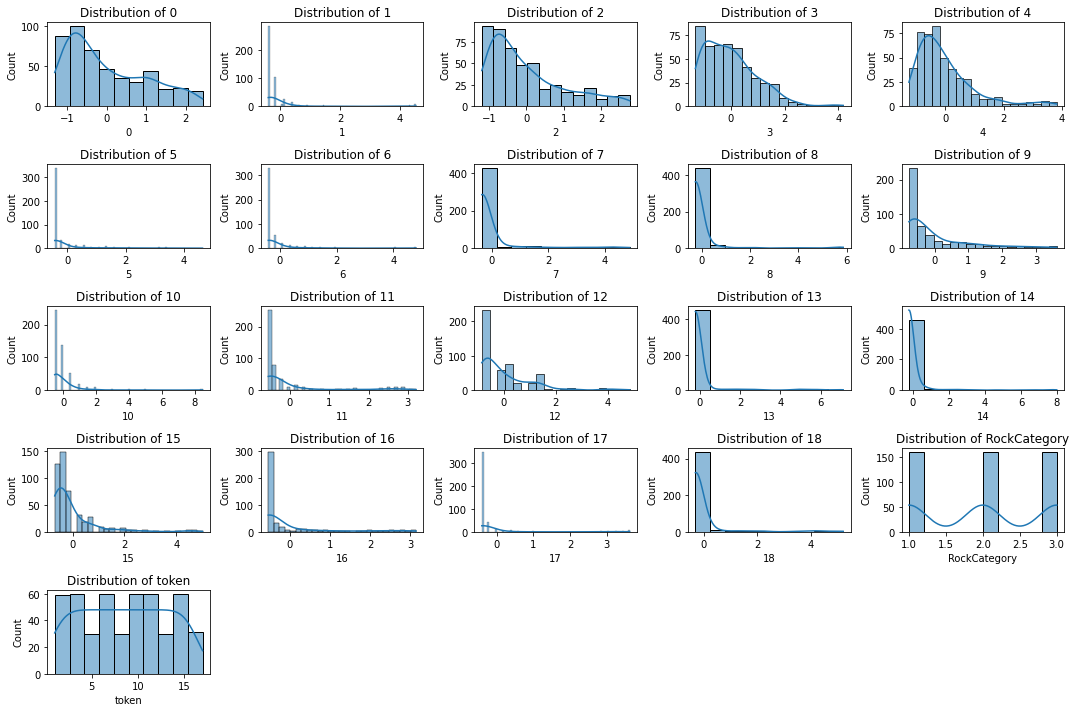

In [21]:
# Visualize attribute distributions using histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

### special treatment

#### 1.)To Scale all the columns we used Standard Scalar 
#### 2.)Most of the data is skewed So, we used Yeo-Johnson transformation to make the skewed distribution normal. Yeo-Johnson transformation can be applied to both positively skewed (right-skewed) and negatively skewed (left-skewed) data to make it more symmetric and approximately normal.

In [22]:
from scipy import stats
from scipy.stats import yeojohnson
for column in data.columns:
    if column!='RockCategory' and column!='token':
        data[column],lambda_value= stats.yeojohnson(data[column])

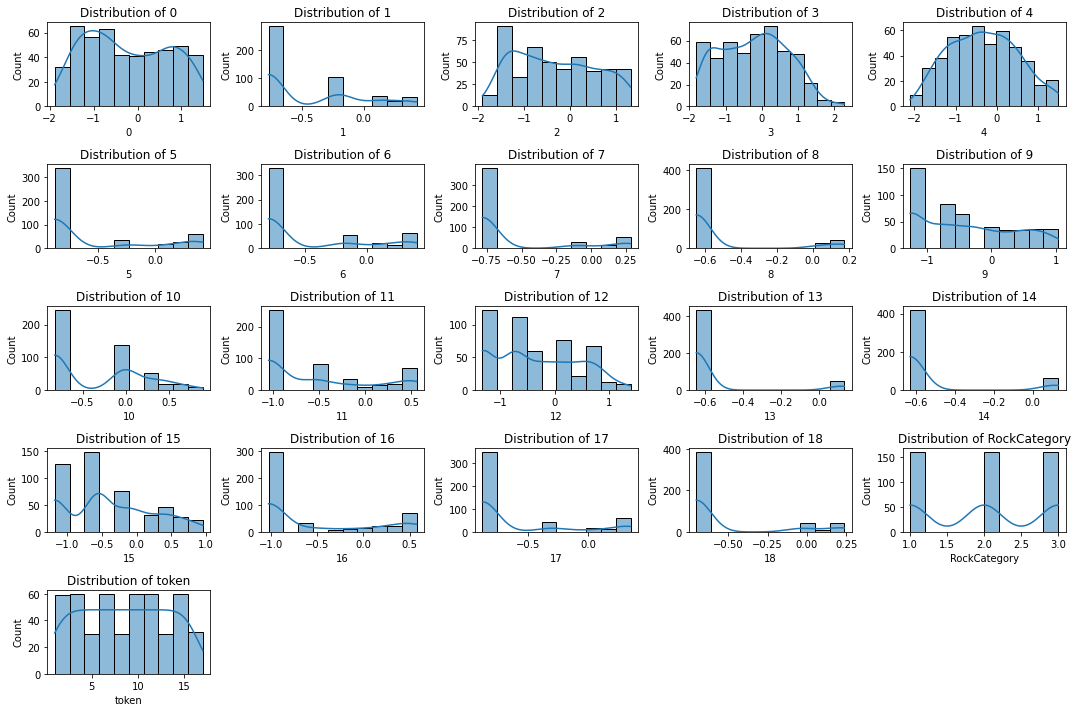

In [23]:
# Visualize attribute distributions using histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

### 2.)Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

In [24]:
data.corr()

0         1         2         3         4         5  \
0             1.000000  0.283689  0.304078  0.556713 -0.612324  0.720778   
1             0.283689  1.000000  0.053296 -0.060110 -0.448401  0.180683   
2             0.304078  0.053296  1.000000  0.066213 -0.208490  0.134123   
3             0.556713 -0.060110  0.066213  1.000000 -0.042949  0.542449   
4            -0.612324 -0.448401 -0.208490 -0.042949  1.000000 -0.356030   
5             0.720778  0.180683  0.134123  0.542449 -0.356030  1.000000   
6             0.758846  0.232222  0.227841  0.471110 -0.451265  0.659595   
7            -0.166292 -0.155938  0.012407 -0.059012  0.146390 -0.195249   
8            -0.033599 -0.157592  0.025194 -0.009841  0.162855 -0.186126   
9            -0.595582 -0.344180 -0.069107 -0.371369  0.497234 -0.338242   
10           -0.190450 -0.249207  0.022957 -0.166831  0.168090 -0.164794   
11           -0.271337 -0.206557 -0.075183  0.337528  0.525119 -0.114402   
12            0.546971  0.083159  0.204394  0.288384 -0.314047  0.363817   
13           -0.171474 -0.151107 -0.214758  0.230292  0.217759 -0.135640   
14            0.273880  0.050281  0.124897  0.429801 -0.112095  0.269962   
15           -0.119200  0.263404  0.009004 -0.589920 -0.269928 -0.186033   
16            0.825434  0.211935  0.229641  0.572996 -0.420814  0.875386   
17           -0.159758 -0.191533  0.016201 -0.059493  0.186346 -0.246297   
18            0.084886 -0.049025 -0.023142  0.419421  0.054482  0.116397   
RockCategory -0.317080 -0.301754 -0.088823 -0.159282  0.240094 -0.284108   
token        -0.029185  0.063407 -0.195248 -0.027429 -0.135107  0.042942   

                     6         7         8         9  ...        11        12  \
0             0.758846 -0.166292 -0.033599 -0.595582  ... -0.271337  0.546971   
1             0.232222 -0.155938 -0.157592 -0.344180  ... -0.206557  0.083159   
2             0.227841  0.012407  0.025194 -0.069107  ... -0.075183  0.204394   
3             0.471110 -0.059012 -0.009841 -0.371369  ...  0.337528  0.288384   
4            -0.451265  0.146390  0.162855  0.497234  ...  0.525119 -0.314047   
5             0.659595 -0.195249 -0.186126 -0.338242  ... -0.114402  0.363817   
6             1.000000 -0.239017 -0.114205 -0.399520  ... -0.162221  0.347671   
7            -0.239017  1.000000  0.423220  0.132032  ...  0.007631 -0.190346   
8            -0.114205  0.423220  1.000000 -0.099783  ... -0.040129 -0.084375   
9            -0.399520  0.132032 -0.099783  1.000000  ...  0.264371 -0.372552   
10           -0.232114  0.185634  0.149870  0.237070  ... -0.018692  0.099907   
11           -0.162221  0.007631 -0.040129  0.264371  ...  1.000000 -0.159437   
12            0.347671 -0.190346 -0.084375 -0.372552  ... -0.159437  1.000000   
13           -0.174561  0.051463 -0.039188 -0.084755  ...  0.190197 -0.029161   
14            0.165369 -0.094206 -0.138688 -0.217392  ...  0.091621  0.122725   
15           -0.132470  0.017754 -0.042328 -0.008844  ... -0.544399 -0.063421   
16            0.893176 -0.236348 -0.161589 -0.408488  ... -0.128662  0.374820   
17           -0.252874  0.875276  0.720758  0.064174  ... -0.009358 -0.195286   
18            0.030379 -0.027302 -0.117535 -0.201522  ...  0.165913  0.102490   
RockCategory -0.215173  0.112497  0.012311  0.307477  ...  0.055573 -0.275665   
token        -0.004742 -0.023458 -0.037623  0.034328  ... -0.012688 -0.052628   

                    13        14        15        16        17        18  \
0            -0.171474  0.273880 -0.119200  0.825434 -0.159758  0.084886   
1            -0.151107  0.050281  0.263404  0.211935 -0.191533 -0.049025   
2            -0.214758  0.124897  0.009004  0.229641  0.016201 -0.023142   
3             0.230292  0.429801 -0.589920  0.572996 -0.059493  0.419421   
4             0.217759 -0.112095 -0.269928 -0.420814  0.186346  0.054482   
5            -0.135640  0.269962 -0.186033  0.875386 -0.246297  0.116397   
6            -0.174561  0.165369 

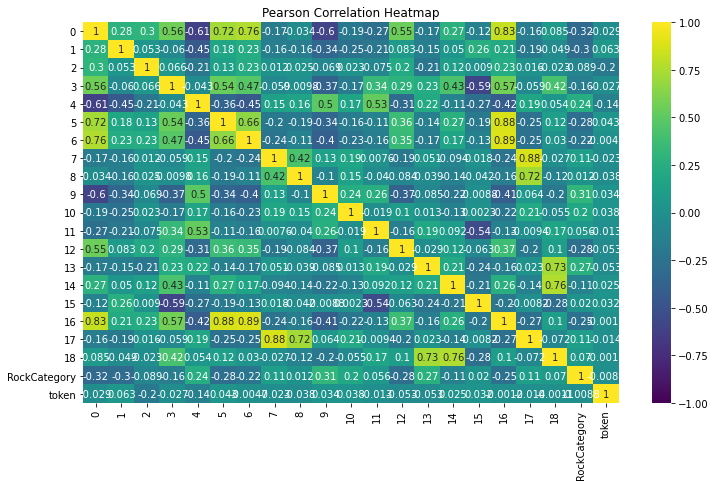

In [25]:
correlation_matrix = data.corr(method='pearson')
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

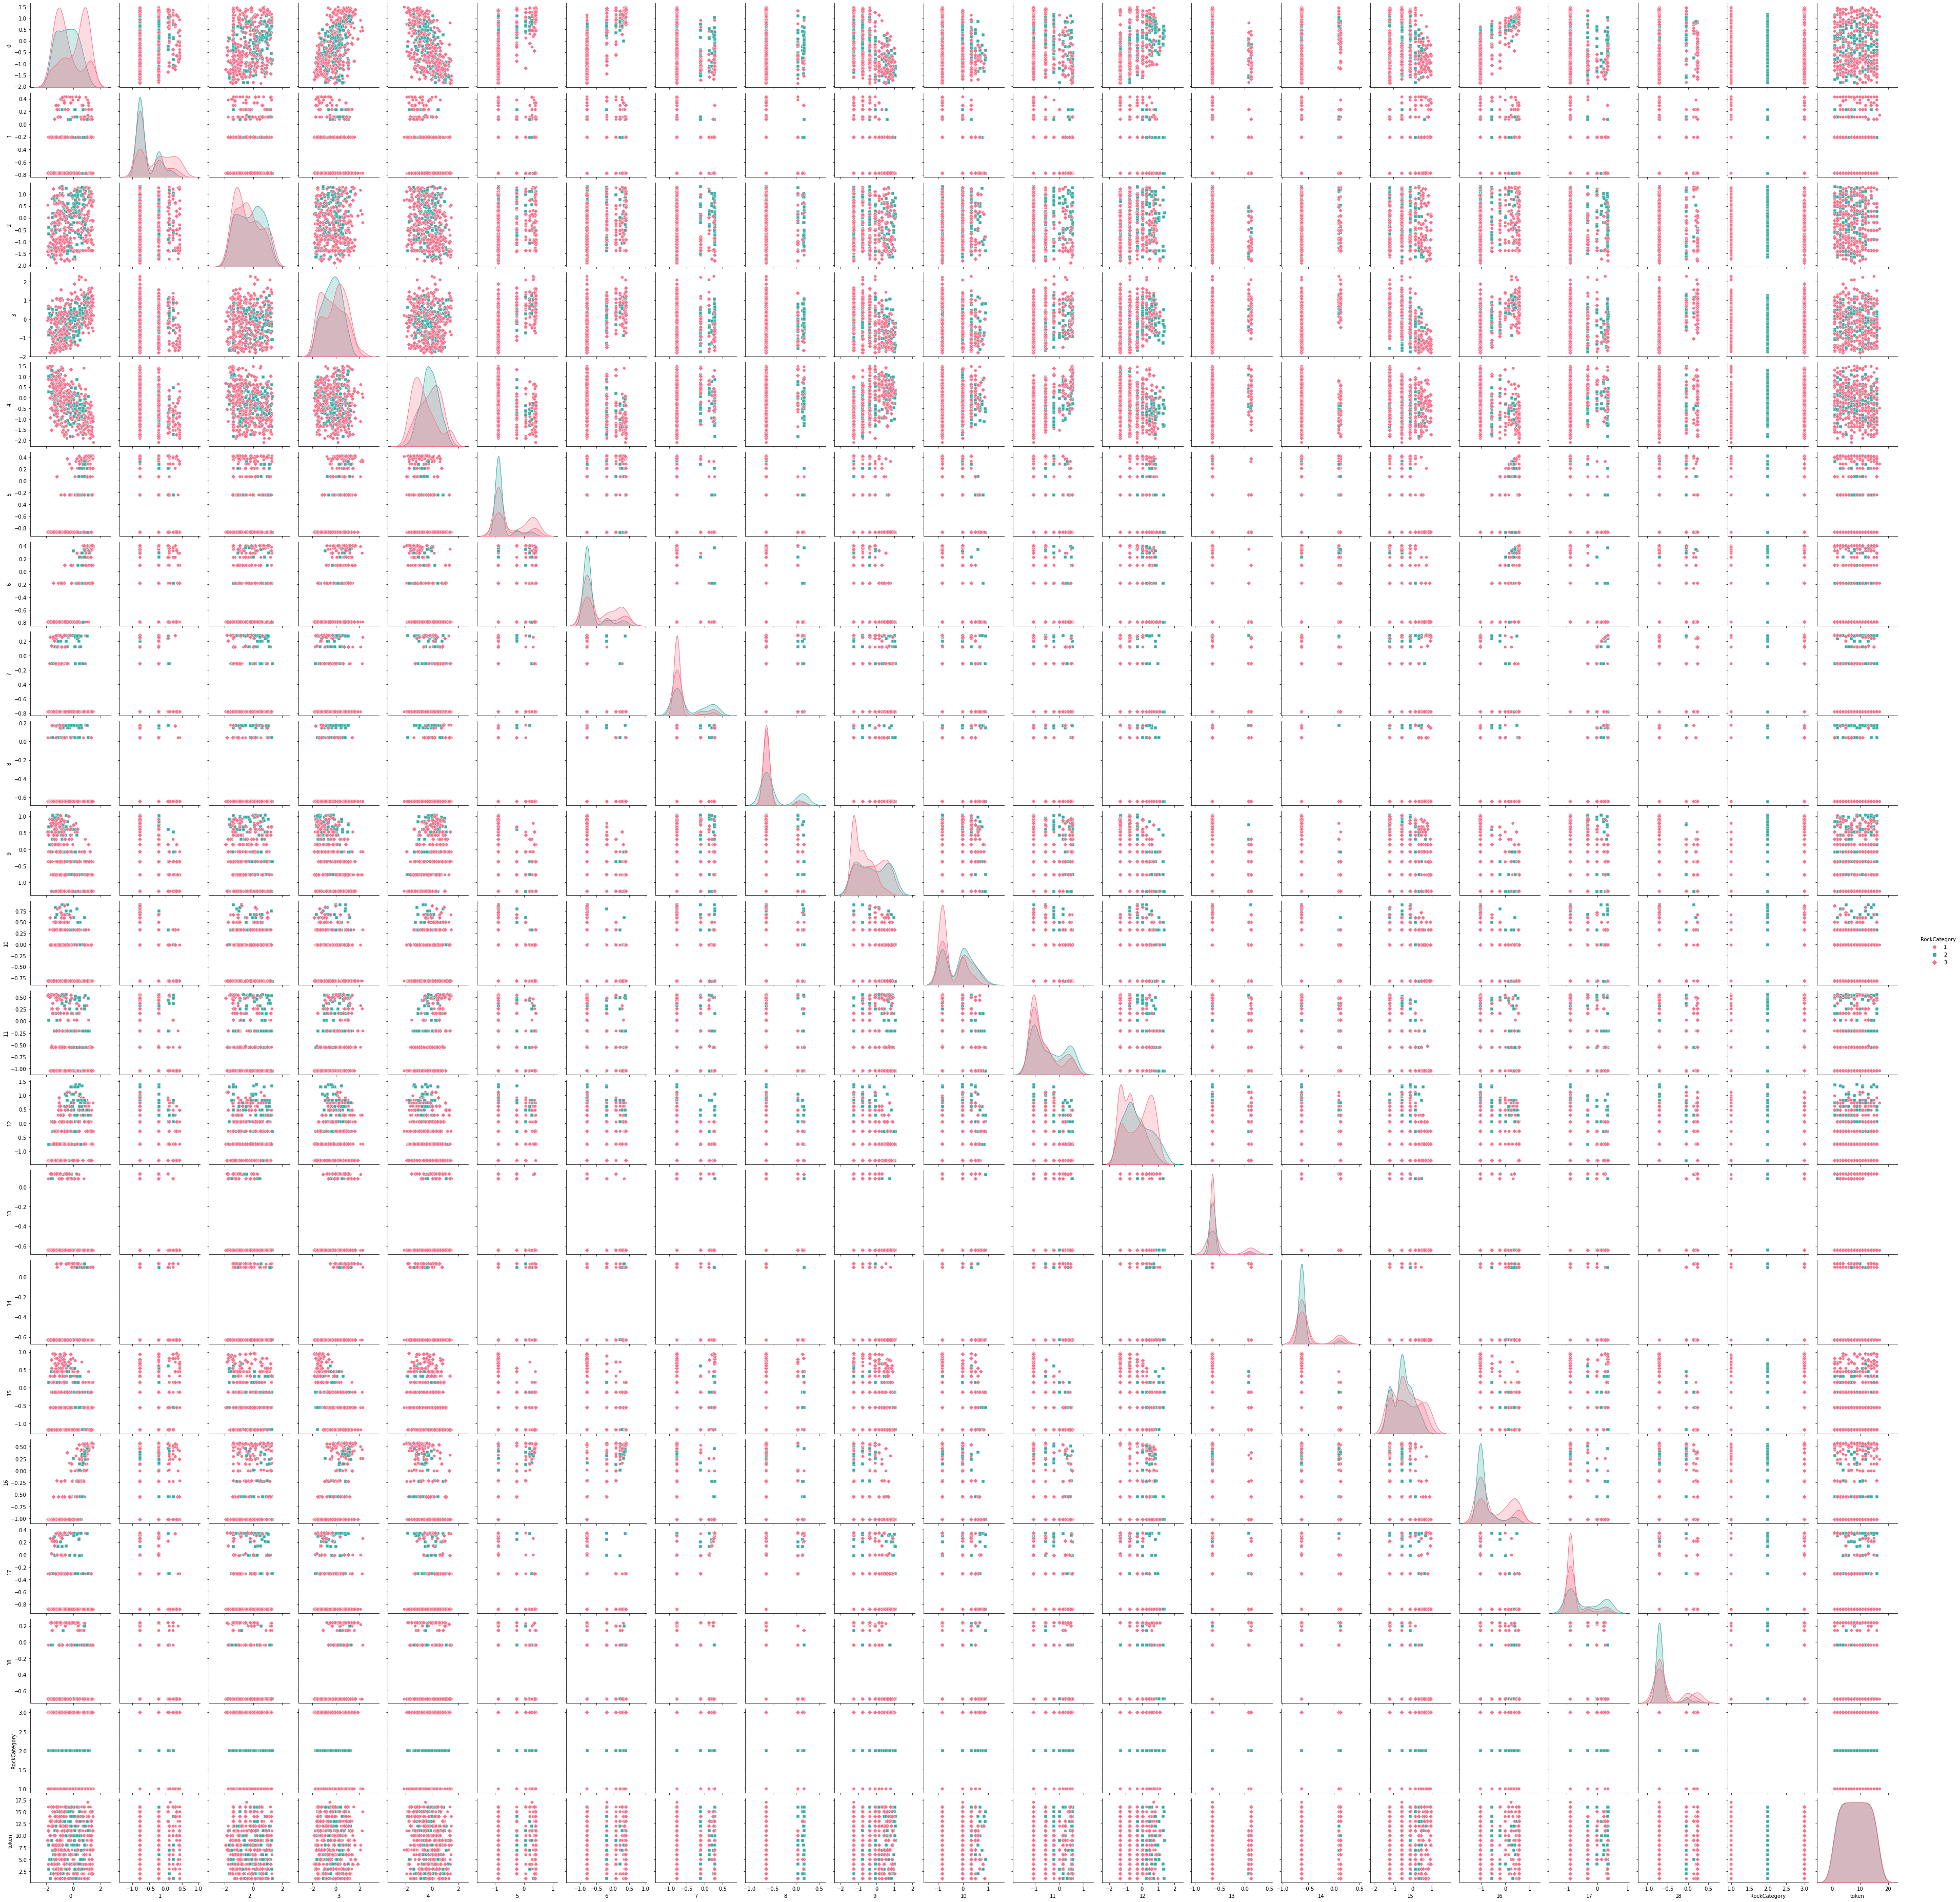

In [38]:
sns.pairplot(data, vars=data.columns, hue="RockCategory", markers=["o", "s", "D"], palette="husl")
plt.show()

### For training data, use token numbers 1-10, for validation 11 to 13, and for testing 14 to 16 (each of the 30 rock subtypes has 16 token numbers).

In [26]:
# Split based on a condition
train = data[data['token'].isin([1,2,3,4,5,6,7,8,9,10])]
test = data[data['token'].isin([11,12,13])]
val = data[data['token'].isin([14,15,16])]

print(train.shape)
print(test.shape)
print(val.shape)

(299, 21)
(90, 21)
(90, 21)


In [27]:
train.drop('token', axis=1, inplace=True)
test.drop('token', axis=1, inplace=True)
val.drop('token', axis=1, inplace=True)

In [28]:
y_train = train['RockCategory']
y_test = test['RockCategory']
y_val = val['RockCategory']


In [29]:
train.drop('RockCategory', axis=1, inplace=True)
test.drop('RockCategory', axis=1, inplace=True)
val.drop('RockCategory', axis=1, inplace=True)

### 4.)Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):

#### A.)Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations.

In [30]:
# Define the model and parameters for lr_grid search

lr = LogisticRegression(multi_class='multinomial', max_iter=10000)
pg = {'C': [0.1, 1, 5, 10, 100], 'solver': ['sag','saga', 'lbfgs','newton-cg']}

# Perform grid search
lr_grid = GridSearchCV(lr, pg, cv=5, scoring='accuracy')
lr_grid.fit(train, y_train)

# Best parameters and score
print(f"Best parameters: {lr_grid.best_params_}")
print(f"Best cross-validation score: {lr_grid.best_score_}")

# Evaluation on the validation set
y_pred = lr_grid.predict(val)
print(classification_report(y_val, y_pred))

# Evaluation on the test set
y_pred_test = lr_grid.predict(test)
print(classification_report(y_test, y_pred_test))


Best parameters: {'C': 100, 'solver': 'sag'}
Best cross-validation score: 0.5054237288135593
              precision    recall  f1-score   support

           1       0.61      0.73      0.67        30
           2       0.64      0.53      0.58        30
           3       0.52      0.50      0.51        30

    accuracy                           0.59        90
   macro avg       0.59      0.59      0.59        90
weighted avg       0.59      0.59      0.59        90

              precision    recall  f1-score   support

           1       0.67      0.87      0.75        30
           2       0.67      0.67      0.67        30
           3       0.67      0.47      0.55        30

    accuracy                           0.67        90
   macro avg       0.67      0.67      0.66        90
weighted avg       0.67      0.67      0.66        90



#### Logistic regression by default uses l2 regularization although we can control that using the parameter C. Larger values of C result in weaker regularization.The solver parameter specifies the algorithm to use in the optimization problem. The sag solver stands for Stochastic Average Gradient descent.

#### B.)Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.

In [31]:
# Import necessary libraries
from sklearn.svm import SVC

# Define the model and parameters for grid search
model = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # only used for 'poly' kernel
    'gamma': ['scale', 'auto']
}

# Perform grid search
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(train, y_train)

# Best parameters and score
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_}")

# Evaluation on the validation set
y_pred = grid.predict(val)
print(classification_report(y_val, y_pred))

# Evaluation on the test set
y_pred_test = grid.predict(test)
print(classification_report(y_test, y_pred_test))


Best parameters: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}
Best cross-validation score: 0.49480225988700566
              precision    recall  f1-score   support

           1       0.55      0.57      0.56        30
           2       0.69      0.37      0.48        30
           3       0.44      0.63      0.52        30

    accuracy                           0.52        90
   macro avg       0.56      0.52      0.52        90
weighted avg       0.56      0.52      0.52        90

              precision    recall  f1-score   support

           1       0.59      0.77      0.67        30
           2       0.63      0.40      0.49        30
           3       0.53      0.57      0.55        30

    accuracy                           0.58        90
   macro avg       0.58      0.58      0.57        90
weighted avg       0.58      0.58      0.57        90



####  The C parameter in SVM represents the regularization parameter. It controls the trade-off between achieving a smooth decision boundary and classifying the training points correctly. A smaller C encourages a simpler decision boundary, while a larger C allows the model to focus more on correctly classifying each data point.
#### The degree=2  parameter is specific to the polynomial kernel ('poly'). It represents the degree of the polynomial used in the kernel function.
#### The gamma parameter defines how far the influence of a single training example reaches. gamma=auto means the algorithm will automatically adjust the gamma value based on the input data.
####  The kernel parameter determines the type of hyperplane used to separate the data. 'sigmoid' is the chosen kernel function in this case. The sigmoid kernel is suitable for non-linear decision boundaries.

#### C.)Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.

In [32]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Define the model and parameters for grid search
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(train, y_train)

# Best parameters and score
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_}")

# Feature importance
best_rf = grid.best_estimator_
feature_importances = best_rf.feature_importances_
print("Feature importances:", feature_importances)

# Evaluation on the validation set
y_pred = grid.predict(val)
print(classification_report(y_val, y_pred))

# Evaluation on the test set
y_pred_test = grid.predict(test)
print(classification_report(y_test, y_pred_test))


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.5051412429378531
Feature importances: [0.11768475 0.05160845 0.08345791 0.0663652  0.14225268 0.03971652
 0.03040478 0.02339422 0.0163083  0.04703187 0.02882934 0.04216589
 0.05504376 0.01678716 0.01406887 0.07251734 0.06603829 0.03736554
 0.04895912]
              precision    recall  f1-score   support

           1       0.66      0.77      0.71        30
           2       0.71      0.57      0.63        30
           3       0.61      0.63      0.62        30

    accuracy                           0.66        90
   macro avg       0.66      0.66      0.65        90
weighted avg       0.66      0.66      0.65        90

              precision    recall  f1-score   support

           1       0.76      0.83      0.79        30
           2       0.67      0.67      0.67        30
           3       0.78      0.70      0.74        30

    accuracy   

####  The max_depth parameter represents the maximum depth of each decision tree in the random forest. It controls the complexity of individual trees. In this case, the best model was found with a maximum depth of 10.
#### The min_samples_leaf parameter sets the minimum number of samples required to be at a leaf node.
####  The min_samples_split parameter determines the minimum number of samples required to split an internal node. It controls the minimum size of samples that are required to make a node split. 
####  The n_estimators parameter specifies the number of trees in the random forest. It controls the ensemble size. A higher number of trees generally leads to better performance
#### 

### 5.)Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings.

In [33]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Base classifiers
clf1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1, max_iter=10000)
clf2 = SVC(probability=True, kernel='rbf', C=1, gamma='scale')
clf3 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Voting ensemble
voting_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('svc', clf2),
    ('rf', clf3)
], voting='soft')

voting_clf.fit(train, y_train)


ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
ada_clf.fit(train, y_train)


# Stacking ensemble
stacking_clf = StackingClassifier(estimators=[
    ('lr', clf1),
    ('svc', clf2),
    ('rf', clf3)
], final_estimator=LogisticRegression())

stacking_clf.fit(train, y_train)

# Evaluate Voting Classifier
y_pred_voting = voting_clf.predict(test)
print("Voting Classifier Performance on Validation Set:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_voting)}")
print(f"Precision: {precision_score(y_val, y_pred_voting, average='macro')}")
print(f"Recall: {recall_score(y_val, y_pred_voting, average='macro')}")
print(f"F1 Score: {f1_score(y_val, y_pred_voting, average='macro')}")

# Evaluation on the validation set
y_pred_ada = ada_clf.predict(test)
print("AdaBoost Classifier Performance on Validation Set:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_ada)}")
print(f"Precision: {precision_score(y_val, y_pred_ada, average='macro')}")
print(f"Recall: {recall_score(y_val, y_pred_ada, average='macro')}")
print(f"F1 Score: {f1_score(y_val, y_pred_ada, average='macro')}")


# Evaluate Stacking Classifier
y_pred_stacking = stacking_clf.predict(test)
print("\nStacking Classifier Performance on Validation Set:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_stacking)}")
print(f"Precision: {precision_score(y_val, y_pred_stacking, average='macro')}")
print(f"Recall: {recall_score(y_val, y_pred_stacking, average='macro')}")
print(f"F1 Score: {f1_score(y_val, y_pred_stacking, average='macro')}")


Voting Classifier Performance on Validation Set:
Accuracy: 0.7555555555555555
Precision: 0.7719744874216419
Recall: 0.7555555555555555
F1 Score: 0.7509899704117643
AdaBoost Classifier Performance on Validation Set:
Accuracy: 0.6111111111111112
Precision: 0.6011042097998619
Recall: 0.6111111111111112
F1 Score: 0.5986377880242268

Stacking Classifier Performance on Validation Set:
Accuracy: 0.7
Precision: 0.701058201058201
Recall: 0.7000000000000001
F1 Score: 0.6915089268030444


#### The Voting Classifier combines the predictions of three base classifiers (Logistic Regression, SVM, and Random Forest) using a soft voting strategy.The Voting Classifier achieved the highest accuracy and F1 score among the three models on the validation set.
#### AdaBoost has the lowest accuracy but may perform differently on other datasets or benefit from hyperparameter tuning.
#### Stacking Classifier falls between the Voting and AdaBoost classifiers in terms of accuracy.

### 6.)Is your method better than a human? Test that by taking human data from trialData.csv Download trialData.csv(see hereLinks to an external site. for a description of the file). Compute human accuracy on train and test data (use only rocks with numbers 1 to 480 and note that Block number 1-3 is training, number 4 is test). How does it compare to the accuracy of your best model? [2 points] Then, compute the average human accuracy for each of the 480 rocks and the standard deviation of accuracy for each of the 480 rocks (regardless of whether they are train or test rocks). Make a plot with the x-axis showing rock numbers (1 to 480) and the y-axis showing average human accuracy (values between 0 and 1) and standard deviation for each of 480 rocks. [2 points] Then, add the accuracy of your model for each of those rocks (1 for correct classification and 0 for incorrect classification) on the same plot (in a different color). What do you observe - is your model making similar errors as humans? 

In [42]:
data_trial = pd.read_csv('trialData.csv')
sorted_data = data_trial.sort_values(by='rocknumber')
filtered_data = sorted_data[sorted_data['rocknumber'] <= 480]
train_data = filtered_data[(filtered_data['block'] >= 1) & (filtered_data['block'] <= 3)].copy()
test_data = filtered_data[filtered_data['block'] == 4].copy()

# Calculate training accuracy
train_accuracy = train_data['cat_correct'].sum() / len(train_data)
print(train_accuracy)
# Calculate test accuracy
test_accuracy = test_data['cat_correct'].sum() / len(test_data)
print(test_accuracy)

0.5599349490660221
0.5984143924378716


#### The test accuracy using human data is 0.59 and training accuracy is 0.55
#### The best model which we got has the accuracy of 0.74 and F1 Score of 0.741 which is way higher the human model

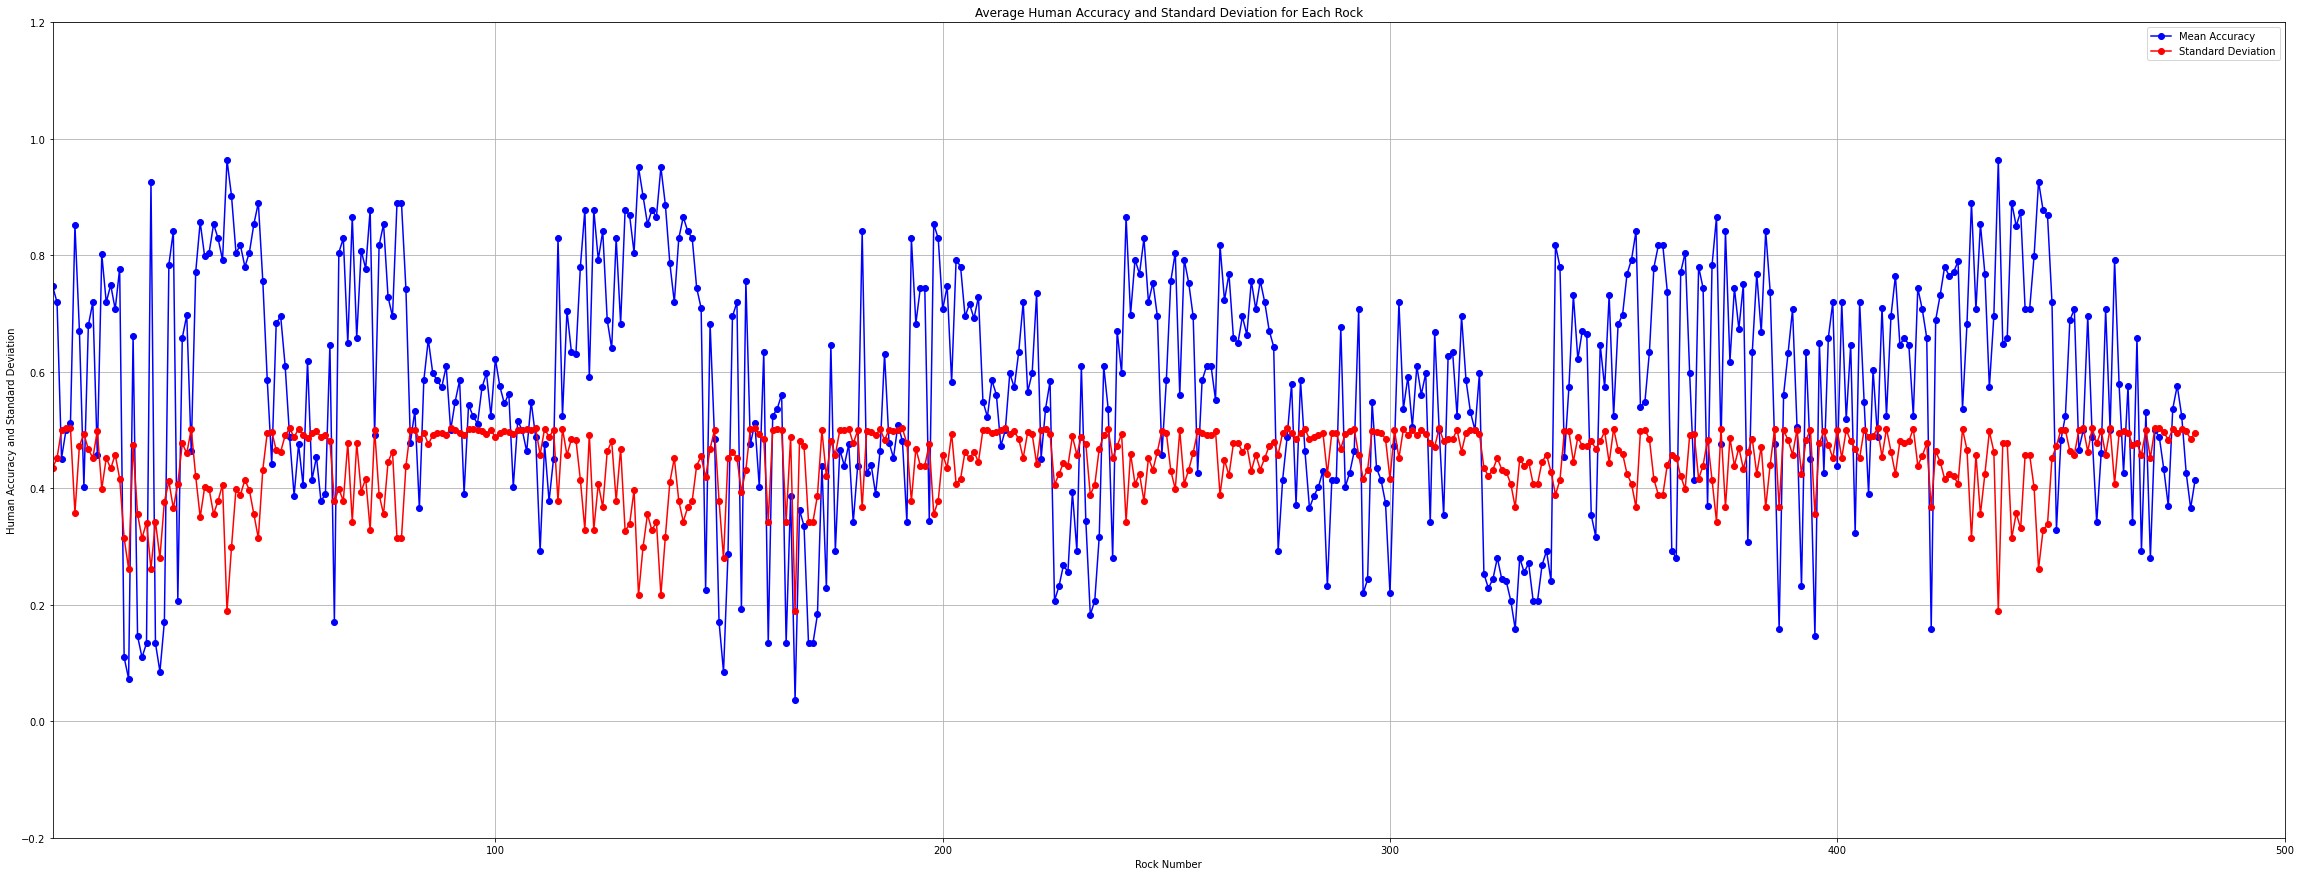

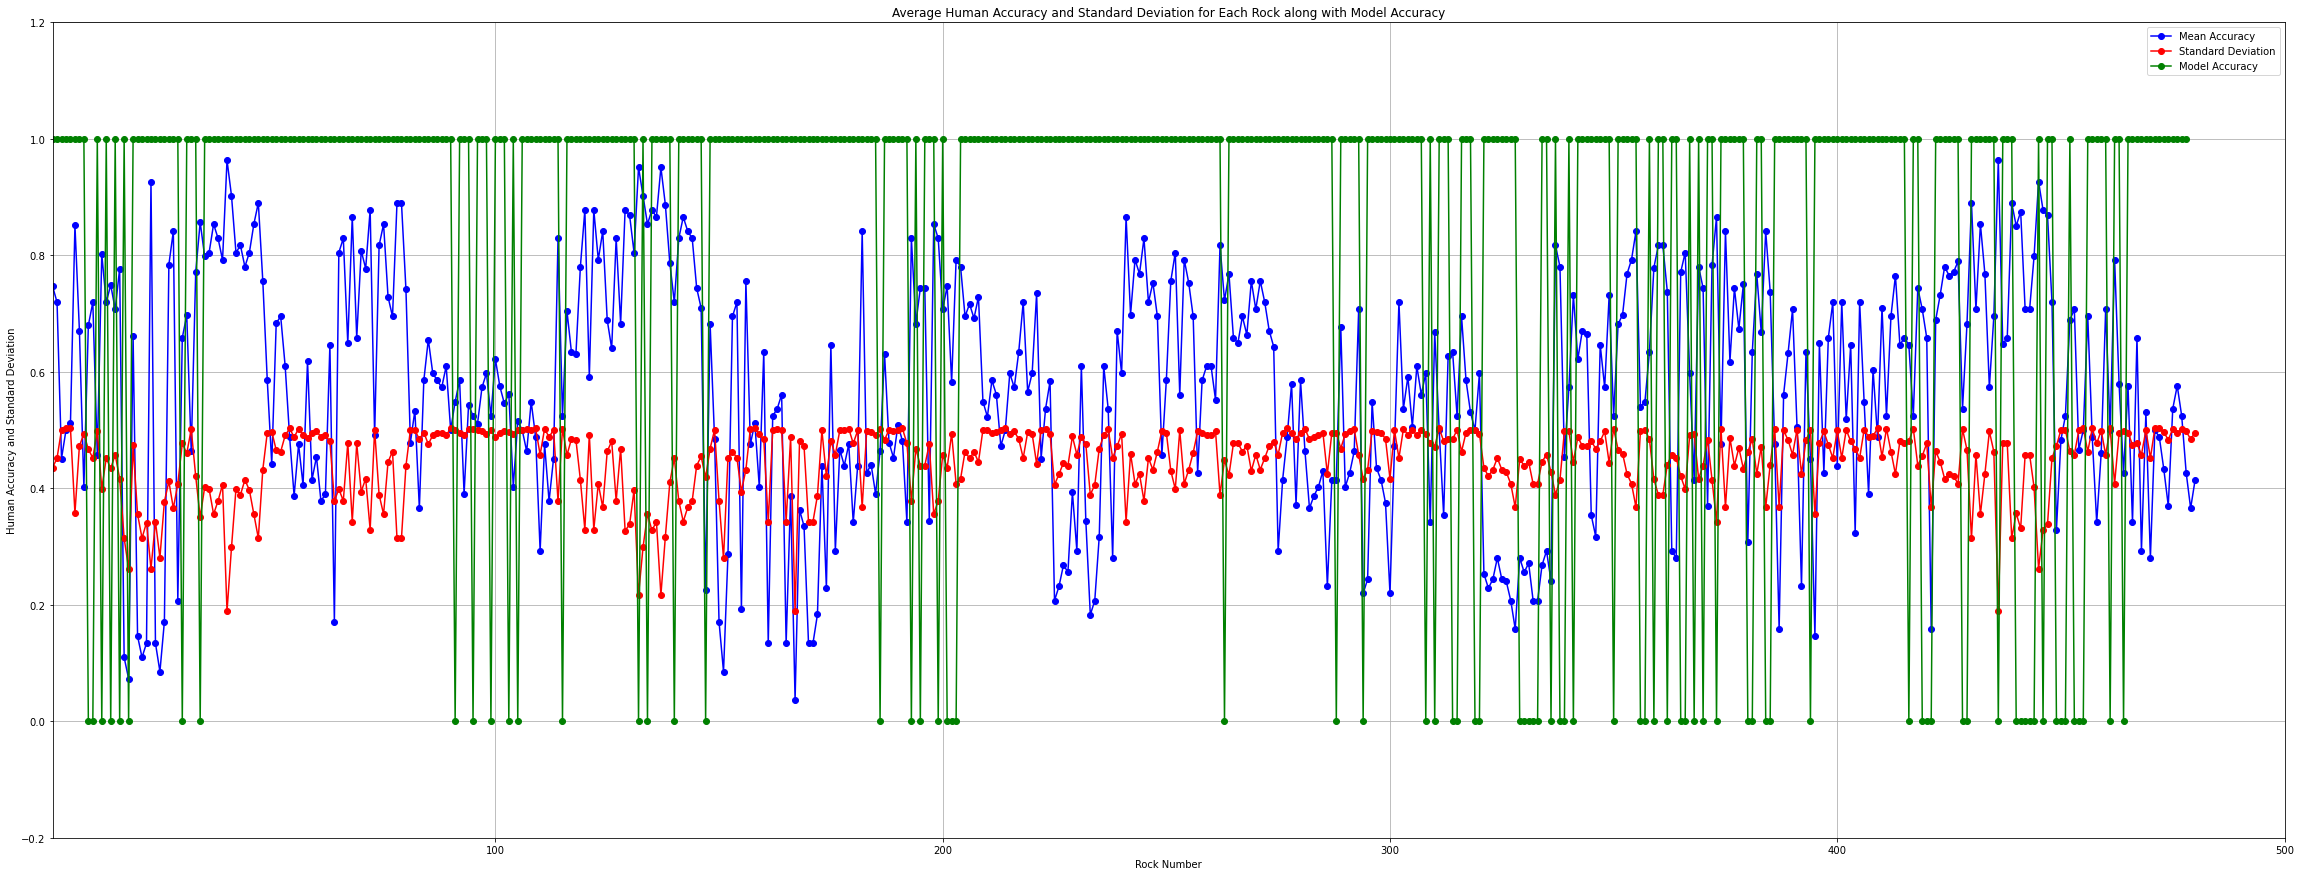

In [43]:
# Ploting human accuracy and standard deviation against rock numbers
rock_stats = filtered_data.groupby('rocknumber')['cat_correct'].agg(['mean', 'std'])
rock_stats.reset_index(inplace=True)
plt.figure(figsize=(40, 15))
plt.plot(rock_stats['rocknumber'], rock_stats['mean'], marker='o', color='b', label='Mean Accuracy')
plt.plot(rock_stats['rocknumber'], rock_stats['std'], marker='o', color='r', label='Standard Deviation')
plt.xlabel('Rock Number')
plt.ylabel('Human Accuracy and Standard Deviation')
plt.title('Average Human Accuracy and Standard Deviation for Each Rock')
plt.ylim(-0.2, 1.2)
plt.xlim(1, 500)
plt.legend()
plt.grid(True)
plt.show()

# Merging data to calculate the model accuracy
final_data = pd.concat([train, val, test], axis=0)
final_label = pd.concat([y_train, y_val, y_test], axis=0)

final_label_pred = voting_clf.predict(final_data)

# Calculating the model accuracy
model_accuracy = [1 if int(pred) == int(label) else 0 for pred, label in zip(final_label_pred, final_label)]

# Ploting human accuracy, standard deviation, and model accuracy against rock numbers.
rock_stats = filtered_data.groupby('rocknumber')['cat_correct'].agg(['mean', 'std'])
rock_stats.reset_index(inplace=True)

plt.figure(figsize=(40, 15))
plt.plot(rock_stats['rocknumber'], rock_stats['mean'], marker='o', color='b', label='Mean Accuracy')
plt.plot(rock_stats['rocknumber'], rock_stats['std'], marker='o', color='r', label='Standard Deviation')
plt.plot(model_accuracy, marker='o', color='g', label='Model Accuracy')
plt.xlabel('Rock Number')
plt.ylabel('Human Accuracy and Standard Deviation')
plt.title('Average Human Accuracy and Standard Deviation for Each Rock along with Model Accuracy')
plt.ylim(-0.2, 1.2)
plt.xlim(1, 500)
plt.legend()
plt.grid(True)
plt.show()
